In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def cluster_map_145_weekday(df):
    cluster_names = {
        0: 'Morning',
        1: 'Late Afternoon',
        2: 'Night',
        3: 'Midday',
        4: 'Overnight'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [3]:
def cluster_map_145_sat(df):
    cluster_names = {
        0: 'Midday',
        1: 'Night',
        2: 'Morning',
        3: 'Late Afternoon',
        4: 'Overnight'  
    }
    df['period'] = df['cluster'].map(cluster_names)

In [4]:
def cluster_map_145_sun(df):
    cluster_names = {
        0: 'Night',
        1: 'Midday',
        2: 'Morning',
        3: 'Late Afternoon',
        4: 'Overnight'  
    }

    df['period'] = df['cluster'].map(cluster_names)

In [5]:
def cluster_map_144_weekday(df):
    cluster_names = {
        0: 'Midday',
        1: 'Night',
        2: 'Morning',
        3: 'Late Afternoon',
        4: 'Overnight'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [6]:
def cluster_map_144_sat(df):
    cluster_names = {
        0: 'Midday',
        1: 'Night',
        2: 'Morning',
        3: 'Late Afternoon',
        4: 'Overnight'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [7]:
def cluster_map_144_sun(df):
    cluster_names = {
        0: 'Midday',
        1: 'Night',
        2: 'Morning',
        3: 'Overnight',
        4: 'Late Afternoon'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [8]:
def cluster_map_143_weekday(df):
    cluster_names = {
        0: 'Late Afternoon',
        1: 'Morning',
        2: 'Midday',
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [9]:
def cluster_map_R5_weekday(df):
    cluster_names = {
        0: 'Morning',
        1: 'Night',
        2: 'Midday',
        3: 'Overnight',
        4: 'Late Afternoon'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [10]:
def cluster_map_R5_sat(df):
    cluster_names = {
        0: 'Midday',
        1: 'Morning',
        2: 'Night',
        3: 'Overnight',
        4: 'Late Afternoon'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [11]:
def cluster_map_R5_sun(df):
    cluster_names = {
        0: 'Midday',
        1: 'Night',
        2: 'Overnight',
        3: 'Late Afternoon',
        4: 'Morning'  
    }
    # Apply the mapping to create a new column with descriptive labels
    df['period'] = df['cluster'].map(cluster_names)

In [12]:
def main():  
    # Filter out the rows where time_diff is 0 before grouping
#     weekday = pd.read_csv('bus_145_weekday_clustering.csv',index_col=0)
#     sat = pd.read_csv('bus_145_saturday_clustering.csv',index_col=0)
#     sun = pd.read_csv('bus_145_sunday_clustering.csv',index_col=0)

#     weekday = pd.read_csv('bus_144_weekday_clustering.csv',index_col=0)
#     sat = pd.read_csv('bus_144_saturday_clustering.csv',index_col=0)
#     sun = pd.read_csv('bus_144_sunday_clustering.csv',index_col=0)

#     weekday = pd.read_csv('bus_143_weekday_clustering.csv',index_col=0)
    
    weekday = pd.read_csv('bus_R5_weekday_clustering.csv',index_col=0)
    sat = pd.read_csv('bus_R5_saturday_clustering.csv',index_col=0)
    sun = pd.read_csv('bus_R5_sunday_clustering.csv',index_col=0)

#     cluster_map_145_weekday(weekday)
#     cluster_map_145_sat(sat)
#     cluster_map_145_sun(sun)

#     cluster_map_144_weekday(weekday)
#     cluster_map_144_sat(sat)
#     cluster_map_144_sun(sun)

#     cluster_map_143_weekday(weekday)

    cluster_map_R5_weekday(weekday)
    cluster_map_R5_sat(sat)
    cluster_map_R5_sun(sun)
    
    non_zero_time_diff_sat = sat[sat['time_diff'] != 0]
    period_avg_sat = non_zero_time_diff_sat.groupby('period')['time_diff'].mean().reset_index()
    period_avg_sat['day'] = 'Saturday'
#     print(period_avg_sat)
    
    non_zero_time_diff_weekday = weekday[weekday['time_diff'] != 0]
    period_avg_weekday = non_zero_time_diff_weekday.groupby('period')['time_diff'].mean().reset_index()
    period_avg_weekday['day'] = 'Weekday'
#     print(period_avg_weekday)
    
    non_zero_time_diff_sun = sun[sun['time_diff'] != 0]
    period_avg_sun = non_zero_time_diff_sun.groupby('period')['time_diff'].mean().reset_index()
    period_avg_sun['day'] = 'Sunday'
#     print(period_avg_sun)
    
    period_order = ['Morning', 'Midday', 'Late Afternoon', 'Night','Overnight']
#     period_order = ['Morning', 'Midday', 'Late Afternoon']
    day_order = ['Weekday', 'Saturday', 'Sunday']
#     day_order = ['Weekday']
    
    # Combine all DataFrames into one
    df_all_days = pd.concat([period_avg_weekday, period_avg_sat, period_avg_sun])
#     df_all_days = pd.concat([period_avg_weekday])
    
    # Convert the 'period' column to a categorical type with the specified order
    df_all_days['period'] = pd.Categorical(df_all_days['period'], categories=period_order, ordered=True)
    
    # Pivot the combined DataFrame to create a 2D data structure for the heatmap
    df_pivot = df_all_days.pivot(index='period', columns='day', values='time_diff')[day_order]

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 7))

    # Draw the heatmap
    ax = sns.heatmap(df_pivot, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

    # Set the aspect of the plot to be equal, for square cells
    ax.set_aspect("equal")

    # Rotate the labels on y-axis
    plt.yticks(rotation=0)

    plt.title('Average Time Difference Heatmap by Period and Day for Bus R5 get to SFU Bay 2')
    # Save the plot to a file
    plt.savefig('BusR5heatmap.png', dpi=300, bbox_inches='tight')
#     plt.show()

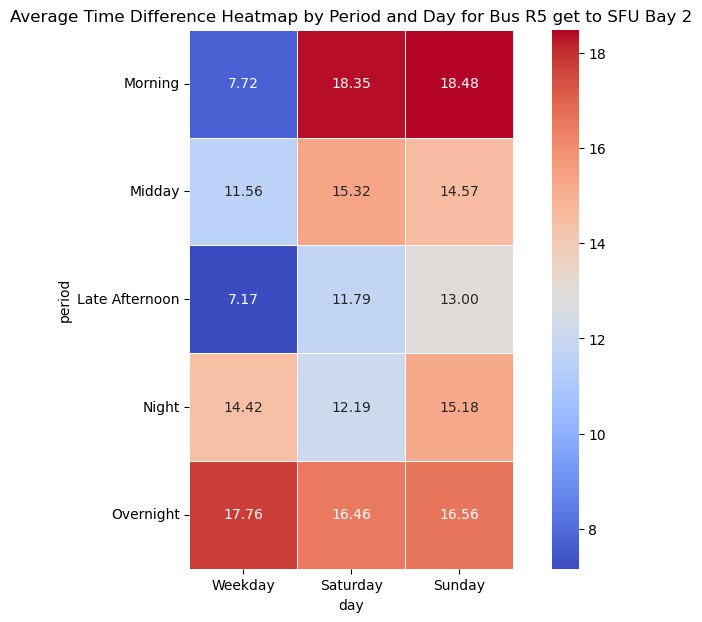

In [13]:
main()